In [1]:
%cd '/scratch/sk7898/l3embedding/classifier/sonyc_ust'
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pk
import numpy as np
import sklearn
import pandas as pd
from classify import get_file_targets, load_embeddings, construct_mlp_mil, construct_mlp_framewise
from metrics import evaluate_df, parse_ground_truth, parse_coarse_prediction

/scratch/sk7898/l3embedding/classifier/sonyc_ust


Using TensorFlow backend.


In [2]:
version = 'v0.4'
SONYC_PATH = '/scratch/work/sonyc/sonyc/ust/annotations'
EMBS_DIR = '/scratch/sk7898/sonyc_output/embeddings'
DATA_FOLDER = os.path.join('/scratch/sk7898/l3embedding/notebooks/data', version)
taxonomy_path = os.path.join(SONYC_PATH, '{}/dcase-ust-taxonomy.yaml'.format(version))

if version == 'v2.2':
    annotation_path = os.path.join(SONYC_PATH, 'latest/annotations_w_test_anns.csv')
else:
    annotation_path = os.path.join(SONYC_PATH, '{}/annotations.csv'.format(version))

annotation_data = pd.read_csv(annotation_path).sort_values('audio_filename')
annotation_data = annotation_data[(annotation_data['annotator_id'] == 0) & (annotation_data['split'] == 'validate')]

with open(taxonomy_path, 'r') as f:
    taxonomy = yaml.load(f, Loader=yaml.Loader)
        
coarse_target_labels = ["_".join([str(k), v]) for k, v in taxonomy['coarse'].items()]
target_labels = [cls[2:] for cls in coarse_target_labels]
coarse_target_list = get_file_targets(annotation_data, coarse_target_labels)

In [3]:
# one_cls_idxs = np.count_nonzero(coarse_target_list==1, axis=1) == 1
# one_cls_targets = coarse_target_list[one_cls_idxs]
# one_cls_files = np.array(annotation_data['audio_filename'])[one_cls_idxs]
# one_cls_splits = np.array(annotation_data['split'])[one_cls_idxs]

# for cls, cls_name in enumerate(target_labels):
#     cls_idx = one_cls_targets[:, cls] == 1
#     val_idxs = np.where(cls_idx & (one_cls_splits == 'validate'))
#     test_idxs = np.where(cls_idx & (one_cls_splits == 'test'))
#     print('{} \n\tValidate: {} Test: {}'.format(cls_name, len(one_cls_files[val_idxs]), len(one_cls_files[test_idxs])))

In [3]:
mlp_path = os.path.join(EMBS_DIR, version, 'classifier/sonyc_ust/mlp/melSpec_20200304183233_48000_256_242_2048/0_0/results')
output_path = os.path.join(mlp_path, 'output_mean.csv')

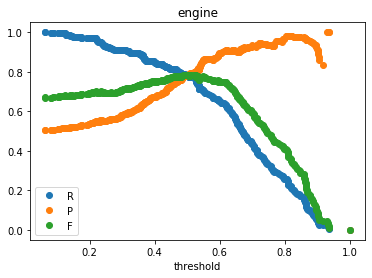

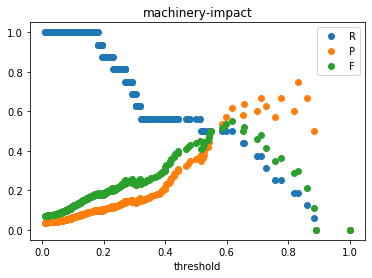

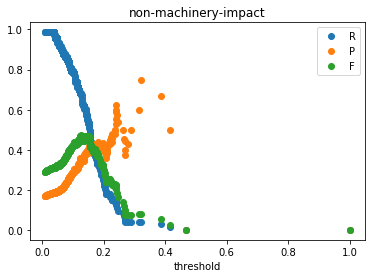

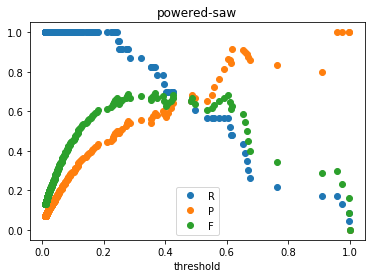

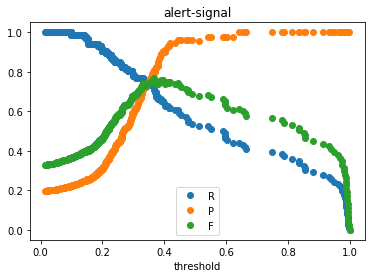

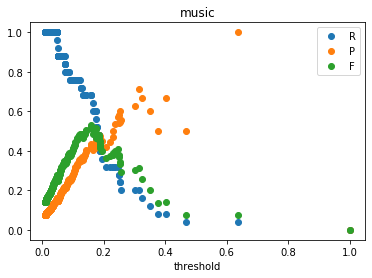

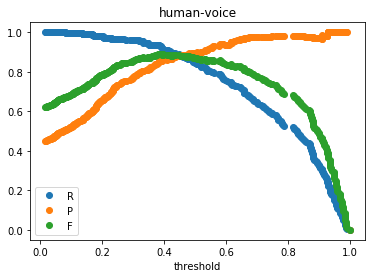

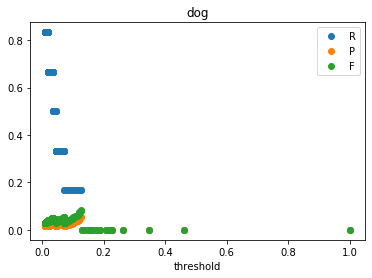

In [4]:
pred_df = parse_coarse_prediction(output_path, taxonomy_path)
gt_df = parse_ground_truth(annotation_path, taxonomy_path)
pred_dict = evaluate_df(gt_df, pred_df, 'coarse', taxonomy)

for cls, cls_df  in pred_dict.items():
    cls_df = cls_df[['threshold', 'R', 'P', 'F']]
    cls_df.plot(x='threshold', style='o')
    plt.title(taxonomy['coarse'][cls])

In [5]:
cls_idx = 1
thres_lower = 0.6
thres_upper = 0.8
df = pred_dict[cls_idx]
res = df[(df['threshold'] > thres_lower) & (df['threshold'] <= thres_upper)]
res

,threshold,TP,FP,FN,P,R,F
60,0.799339,58,2,165,0.966667,0.260090,0.409894
61,0.798652,59,2,164,0.967213,0.264574,0.415493
62,0.795592,60,2,163,0.967742,0.269058,0.421053
63,0.794050,61,2,162,0.968254,0.273543,0.426573
64,0.790516,61,3,162,0.953125,0.273543,0.425087
...,...,...,...,...,...,...,...
157,0.614923,142,15,81,0.904459,0.636771,0.747368
158,0.612143,143,15,80,0.905063,0.641256,0.750656
159,0.605951,143,16,80,0.899371,0.641256,0.748691
160,0.604761,143,17,80,0.893750,0.641256,0.746736
